In [81]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [98]:
dataset_path = "./speech_dataset"
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
#all_targets = ['on', 'off', 'yes', 'no', 'left', 'right']
print(all_targets)

['eight', 'sheila', 'nine', 'yes', 'one', 'no', 'left', 'tree', 'bed', 'bird', 'go', 'wow', 'seven', 'marvin', 'dog', 'three', 'two', 'house', 'backward', 'down', 'six', 'five', 'off', 'right', 'cat', 'zero', 'four', 'forward', 'stop', 'up', 'visual', 'learn', 'on', 'happy', 'follow']


In [99]:
feature_sets_path = "./"
feature_sets_filename = "all_targets_mfcc_sets.npz"
model_filename = 'wake_word_stop_model.h5'
wake_words = ['stop']

In [100]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [101]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [102]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77466, 16, 16)
(9685, 16, 16)
(9705, 16, 16)


In [103]:
wake_word_index = all_targets.index(word)

y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [104]:
print(y_test.shape)

(9705,)


In [105]:
print(x_train.shape)

(77466, 16, 16)


In [106]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77466, 16, 16, 1)
(9685, 16, 16, 1)
(9705, 16, 16, 1)


In [107]:
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [71]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (2,2), 
                        activation='relu', 
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (2,2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (2,2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [73]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [108]:
history = model.fit(x_train,
                   y_train,
                   epochs=30,
                   batch_size=100,
                   validation_data=(x_val, y_val))

Epoch 1/30
775/775 [==============================] - 5s 6ms/step - loss: 0.2042 - acc: 0.9614 - val_loss: 0.1183 - val_acc: 0.9655
Epoch 2/30
775/775 [==============================] - 5s 6ms/step - loss: 0.1137 - acc: 0.9627 - val_loss: 0.1011 - val_acc: 0.9657
Epoch 3/30
775/775 [==============================] - 5s 6ms/step - loss: 0.1013 - acc: 0.9645 - val_loss: 0.0991 - val_acc: 0.9665
Epoch 4/30
775/775 [==============================] - 5s 6ms/step - loss: 0.0964 - acc: 0.9649 - val_loss: 0.0893 - val_acc: 0.9696
Epoch 5/30
775/775 [==============================] - 5s 6ms/step - loss: 0.0905 - acc: 0.9669 - val_loss: 0.0881 - val_acc: 0.9694
Epoch 6/30
775/775 [==============================] - 5s 6ms/step - loss: 0.0859 - acc: 0.9691 - val_loss: 0.0822 - val_acc: 0.9720
Epoch 7/30
775/775 [==============================] - 5s 6ms/step - loss: 0.0851 - acc: 0.9691 - val_loss: 0.0799 - val_acc: 0.9728
Epoch 8/30
775/775 [==============================] - 5s 6ms/step - loss: 0.

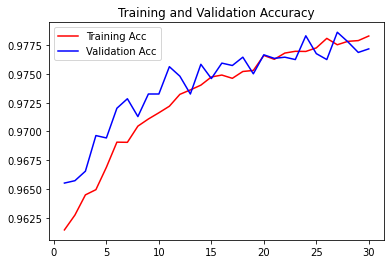

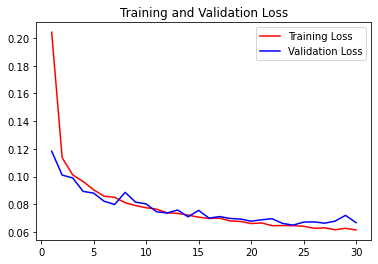

In [109]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [110]:
models.save_model(model, model_filename)

In [111]:
model.evaluate(x=x_test,y=y_test)

304/304 [==============================] - 0s 1ms/step - loss: 0.0634 - acc: 0.9775


[0.06340710818767548, 0.9775373339653015]

In [115]:
from tensorflow import lite
from tensorflow.keras import models
import tensorflow as tf
converter = lite.TFLiteConverter.from_keras_model(model)
def rep_data_gen():
    for i in range(0, 10):
        mfcc = x_test[i]
        mfcc = np.expand_dims(mfcc,0)
        mfcc = mfcc.astype('float32')
        yield [mfcc]
        
converter.optimizations = [lite.Optimize.DEFAULT]
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.representative_dataset = rep_data_gen

converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
model_quant_tflite = converter.convert()

open('wake_word_stop_quant.tflite', 'wb').write(model_quant_tflite)

INFO:tensorflow:Assets written to: /tmp/tmpq5b93k88/assets


INFO:tensorflow:Assets written to: /tmp/tmpq5b93k88/assets


26384

In [118]:
!xxd -i wake_word_stop_quant.tflite > wake_word_stop.cc

REPLACE_TEXT = 'wake_word_stop_quant.tflite'.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' 'wake_word_stop.cc'

In [119]:
!tail wake_word_stop.cc

  0x02, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0e, 0xc8, 0xff, 0xff, 0xff,
  0x09, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x09,
  0x0c, 0x00, 0x0c, 0x00, 0x0b, 0x00, 0x00, 0x00, 0x00, 0x00, 0x04, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x16, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x16,
  0xf0, 0xff, 0xff, 0xff, 0x11, 0x00, 0x00, 0x00, 0x02, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x11, 0x0c, 0x00, 0x10, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x03
};
unsigned int g_model_len = 26384;


In [120]:
26384/1024

25.765625